# Movie Data Project

## Business Understanding
I will write stuff here to describe my problem, and my questions, and my stakeholder, etc etc

-StakeHolder = Microsoft
-Problem = Microsoft opening their own movie studio, suprisingly have no idea about creating movies, need my help
 about ideas to make good movies
 -Questions = What do the consider best movies at the box office, is it ratings, revenue, profits, household familiarity?
 Without actually being able to speak to the stakeholders personally I will go with revenue/profits as an indicator about 
 what is considered a good movie, because as a business profit/revenue is a main concern

## Data Understanding

_Might write summary of the data I end up using here_

-Overviewing data
-probably look at genre performance
-genre performance by month throughout the years
-studios that gross alot of money and which genre of movies do they make

In [1]:
import pandas as pd
import sqlite3

In [2]:
!ls zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [3]:
conn = sqlite3.connect('zippedData/im.db')

In [4]:
c = conn.cursor()

In [5]:
c.execute("""
Select
*
from movie_basics
""")

df_IMDB = pd.DataFrame(c.fetchall(), columns = ["movie_id", "primary_title", "original_title", "start_year", "runtime_mintues", "genres"])
df_IMDB

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
pd.read_sql("""
Select *
from writers
Limit 5;
""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [7]:
pd.read_sql("""
Select *
from sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [8]:
pd.read_sql("""
Select *
from movie_basics
limit 20
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [9]:
df_IMDB["genres"].value_counts()[:400]

Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Animation,Documentary,Family       14
News                               14
Comedy,Music,Musical               13
Action,Western                     13
Comedy,Family,Musical              13
Name: genres, Length: 400, dtype: int64

In [10]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_mintues  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
df_IMDB["name_year"] = df_IMDB["primary_title"] +" "+ df_IMDB["start_year"].astype(str)
df_IMDB

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Kuambil Lagi Hatiku 2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dankyavar Danka 2013
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,6 Gunn 2017


In [12]:
df_IMDB

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Kuambil Lagi Hatiku 2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dankyavar Danka 2013
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,6 Gunn 2017


### *Box Office Mojo*

In [13]:
df_BOM = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [14]:
df_BOM.sort_values("domestic_gross", ascending = False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


### *Rotten Tomatoes Info*

In [15]:
df_ROT = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter = "\t")

In [16]:
df_ROT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [17]:
df_ROT.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### *Rotten Tomatoes Views*

In [18]:
df_ROT_Views = pd.read_csv("zippedData/rt.reviews.tsv.gz", encoding = "unicode-escape", delimiter = "\t")

In [19]:
df_ROT_Views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [20]:
df_ROT_Views['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1135, dtype: int64

### *TMDB*

In [21]:
df_TMDB = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [22]:
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [23]:
df_TMDB.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [24]:
df_TMDB.sort_values('popularity', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
13877,13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1
13878,13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1
13879,13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1
13880,13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,2014-02-13,Unleashed! A Dog Dancing Story,5.0,1


### *The Numbers*

In [25]:
df_Numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [26]:
df_Numbers.loc[df_Numbers["movie"] == "Avatar"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [27]:
df_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
df_Numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
df_Numbers.sort_values("domestic_gross", ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
311,12,"Jul 4, 2008",AstÃ©rix aux Jeux Olympiques,"$113,500,000","$999,811","$132,999,811"
1605,6,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977"
642,43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758"
4373,74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
707,8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
...,...,...,...,...,...,...
2153,54,"Jun 30, 2015",Viy,"$26,000,000",$0,"$34,246,770"
2154,55,"Mar 17, 2015",Accidental Love,"$26,000,000",$0,"$135,436"
2155,56,"Apr 24, 2015",The Face of an Angel,"$26,000,000",$0,$0
4194,95,"May 10, 2011",The Hit List,"$6,000,000",$0,$0


In [30]:
df_Numbers["domestic_gross as numbers"] = (df_Numbers["domestic_gross"].str.split("$").str[1])

In [31]:
df_Numbers["domestic_gross as numbers"] = df_Numbers["domestic_gross as numbers"].apply(lambda x : x.replace(',',""))

In [32]:
df_Numbers["domestic_gross as numbers"]

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross as numbers, Length: 5782, dtype: object

In [33]:
df_Numbers["release_date_year"] = df_Numbers["release_date"].str.split(" ").str[2]

In [34]:
df_Numbers["name_year"] = df_Numbers["movie"] + " " + df_Numbers["release_date_year"]

In [35]:
df_Numbers["release_date_year"] = df_Numbers["release_date_year"].astype(int)

In [36]:
df_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         5782 non-null   int64 
 1   release_date               5782 non-null   object
 2   movie                      5782 non-null   object
 3   production_budget          5782 non-null   object
 4   domestic_gross             5782 non-null   object
 5   worldwide_gross            5782 non-null   object
 6   domestic_gross as numbers  5782 non-null   object
 7   release_date_year          5782 non-null   int32 
 8   name_year                  5782 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 384.1+ KB


In [37]:
df_Numbers['domestic_gross as numbers'] = df_Numbers["domestic_gross as numbers"].astype(int)

In [38]:
df_Numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         5782 non-null   int64 
 1   release_date               5782 non-null   object
 2   movie                      5782 non-null   object
 3   production_budget          5782 non-null   object
 4   domestic_gross             5782 non-null   object
 5   worldwide_gross            5782 non-null   object
 6   domestic_gross as numbers  5782 non-null   int32 
 7   release_date_year          5782 non-null   int32 
 8   name_year                  5782 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 361.5+ KB


In [39]:
df_Numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625,2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",42762350,2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868,2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,2017,Star Wars Ep. VIII: The Last Jedi 2017
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,2018,Red 11 2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482,1999,Following 1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338,2005,Return to the Land of Wonders 2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0,2015,A Plague So Pleasant 2015


In [40]:
df_Numbers.isna().sum()

id                           0
release_date                 0
movie                        0
production_budget            0
domestic_gross               0
worldwide_gross              0
domestic_gross as numbers    0
release_date_year            0
name_year                    0
dtype: int64

In [41]:
df_Numbers.sort_values('domestic_gross as numbers', ascending = False)[:10]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",936662225,2015,Star Wars Ep. VII: The Force Awakens 2015
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625,2009,Avatar 2009
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",700059566,2018,Black Panther 2018
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",678815482,2018,Avengers: Infinity War 2018
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944","$2,208,208,395",659363944,1997,Titanic 1997
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625,2015,Jurassic World 2015
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",623279547,2012,The Avengers 2012
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,2017,Star Wars Ep. VIII: The Last Jedi 2017
43,44,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744,2018,Incredibles 2 2018
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000","$533,720,947","$1,001,996,207",533720947,2008,The Dark Knight 2008


In [42]:
df_BOM.sort_values("domestic_gross", ascending = False)[:10]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [43]:
df_BOM.loc[df_BOM["title"] == "Jurassic World"]

,title,studio,domestic_gross,foreign_gross,year
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [44]:
from difflib import SequenceMatcher

In [45]:
df_test = df_IMDB.set_index("name_year").join(df_Numbers.set_index("name_year"))

In [46]:
df_right_join_test = pd.merge(df_IMDB, df_Numbers, how = "outer", on = ["name_year", "name_year"])

In [47]:
df_right_join_test

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150437,NaN,NaN,NaN,NaN,NaN,NaN,Red 11 2018,78.0,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0.0,2018.0
150438,NaN,NaN,NaN,NaN,NaN,NaN,Following 1999,79.0,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482.0,1999.0
150439,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Land of Wonders 2005,80.0,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338.0,2005.0
150440,NaN,NaN,NaN,NaN,NaN,NaN,A Plague So Pleasant 2015,81.0,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0.0,2015.0


In [48]:
df_test.sort_values("domestic_gross as numbers", ascending =  False)

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
name_year,,,,,,,,,,,,,,
Black Panther 2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42.0,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",700059566.0,2018.0
Avengers: Infinity War 2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7.0,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",678815482.0,2018.0
Jurassic World 2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0
The Avengers 2012,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27.0,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",623279547.0,2012.0
Incredibles 2 2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44.0,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
è solo questione di punti di vista 2012,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
è solo questione di tempo 2013,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
élèctions piege à cons 2014,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,NaN,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_test.isna().sum()

movie_id                          0
primary_title                     0
original_title                   21
start_year                        0
runtime_mintues               31739
genres                         5408
id                           144597
release_date                 144597
movie                        144597
production_budget            144597
domestic_gross               144597
worldwide_gross              144597
domestic_gross as numbers    144597
release_date_year            144597
dtype: int64

In [50]:
df_test2 = df_test.dropna(axis = 0, subset = ["domestic_gross as numbers"])

In [51]:
df_test2

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
name_year,,,,,,,,,,,,,,
#Horror 2015,tt3526286,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,0.0,2015.0
10 Cloverfield Lane 2016,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",72082999.0,2016.0
10 Days in a Madhouse 2015,tt3453052,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",14616.0,2015.0
12 Strong 2018,tt1413492,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",64.0,"Jan 19, 2018",12 Strong,"$35,000,000","$45,819,713","$71,118,378",45819713.0,2018.0
12 Years a Slave 2013,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",18.0,"Oct 18, 2013",12 Years a Slave,"$20,000,000","$56,671,993","$181,025,343",56671993.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zookeeper 2011,tt1222817,Zookeeper,Zookeeper,2011,102.0,"Comedy,Family,Romance",71.0,"Jul 8, 2011",Zookeeper,"$80,000,000","$80,360,866","$170,805,525",80360866.0,2011.0
Zoolander 2 2016,tt1608290,Zoolander 2,Zoolander 2,2016,101.0,Comedy,64.0,"Feb 12, 2016",Zoolander 2,"$50,000,000","$28,848,693","$55,348,693",28848693.0,2016.0
Zootopia 2016,tt2948356,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",57.0,"Mar 4, 2016",Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",341268248.0,2016.0


In [52]:
df_test2.isna().sum()

movie_id                      0
primary_title                 0
original_title                0
start_year                    0
runtime_mintues              26
genres                        6
id                            0
release_date                  0
movie                         0
production_budget             0
domestic_gross                0
worldwide_gross               0
domestic_gross as numbers     0
release_date_year             0
dtype: int64

In [53]:
df_test2['genres'].notna()

name_year
#Horror 2015                       True
10 Cloverfield Lane 2016           True
10 Days in a Madhouse 2015         True
12 Strong 2018                     True
12 Years a Slave 2013              True
                                   ... 
Zookeeper 2011                     True
Zoolander 2 2016                   True
Zootopia 2016                      True
Zulu 2013                          True
xXx: Return of Xander Cage 2017    True
Name: genres, Length: 1547, dtype: bool

In [54]:
df_test2.sort_values("genres", ascending = True)[100::-1]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875.0,2011.0
Tomb Raider 2018,tt1365519,Tomb Raider,Tomb Raider,2018,119.0,"Action,Adventure,Fantasy",70.0,"Mar 16, 2018",Tomb Raider,"$90,000,000","$58,250,803","$273,477,501",58250803.0,2018.0
Thor: The Dark World 2013,tt1981115,Thor: The Dark World,Thor: The Dark World,2013,112.0,"Action,Adventure,Fantasy",66.0,"Nov 8, 2013",Thor: The Dark World,"$150,000,000","$206,362,140","$644,602,516",206362140.0,2013.0
Priest 2011,tt0822847,Priest,Priest,2011,87.0,"Action,Adventure,Fantasy",29.0,"May 13, 2011",Priest,"$60,000,000","$29,136,626","$84,154,026",29136626.0,2011.0
Thor 2011,tt0800369,Thor,Thor,2011,115.0,"Action,Adventure,Fantasy",70.0,"May 6, 2011",Thor,"$150,000,000","$181,030,624","$449,326,618",181030624.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kung Fu Panda 2 2011,tt1302011,Kung Fu Panda 2,Kung Fu Panda 2,2011,90.0,"Action,Adventure,Animation",74.0,"May 26, 2011",Kung Fu Panda 2,"$150,000,000","$165,249,063","$664,837,547",165249063.0,2011.0
Kung Fu Panda 3 2016,tt2267968,Kung Fu Panda 3,Kung Fu Panda 3,2016,95.0,"Action,Adventure,Animation",11.0,"Jan 29, 2016",Kung Fu Panda 3,"$140,000,000","$143,528,619","$517,599,142",143528619.0,2016.0
Falcon Rising 2014,tt2295722,Falcon Rising,Falcon Rising,2014,103.0,"Action,Adventure",54.0,"Sep 4, 2014",Falcon Rising,"$4,500,000","$11,774","$11,774",11774.0,2014.0


In [55]:
df_test2.loc[df_test2["genres"].isna()]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
name_year,,,,,,,,,,,,,,
Believe 2016,tt9347476,Believe,Believe,2016,NaN,None,13.0,"Dec 2, 2016",Believe,"$3,500,000","$890,303","$890,303",890303.0,2016.0
Crossroads 2015,tt5459744,Crossroads,Kurosurôdo,2015,NaN,None,86.0,"Jun 23, 2015",Crossroads,"$500,000",$0,$0,0.0,2015.0
Exeter 2015,tt4931374,Exeter,Exeter,2015,92.0,None,49.0,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",0.0,2015.0
Robin Hood 2018,tt6858500,Robin Hood,Robin Hood,2018,NaN,None,9.0,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",30824628.0,2018.0
The Bounty Hunter 2010,tt1472211,The Bounty Hunter,The Bounty Hunter,2010,NaN,None,73.0,"Mar 19, 2010",The Bounty Hunter,"$45,000,000","$67,061,228","$135,808,837",67061228.0,2010.0
The Prince 2014,tt3918106,The Prince,Ksiaze,2014,71.0,None,53.0,"Aug 22, 2014",The Prince,"$18,000,000",$0,$0,0.0,2014.0


In [56]:
df_test2.sort_values("domestic_gross as numbers", ascending = False).head(25)

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
name_year,,,,,,,,,,,,,,
Black Panther 2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",42.0,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",700059566.0,2018.0
Avengers: Infinity War 2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",7.0,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",678815482.0,2018.0
Jurassic World 2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0
The Avengers 2012,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",27.0,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",623279547.0,2012.0
Incredibles 2 2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",44.0,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744.0,2018.0
Rogue One: A Star Wars Story 2016,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",45.0,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",532177324.0,2016.0
Beauty and the Beast 2017,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",35.0,"Mar 17, 2017",Beauty and the Beast,"$160,000,000","$504,014,165","$1,259,199,706",504014165.0,2017.0
Finding Dory 2016,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",46.0,"Jun 17, 2016",Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",486295561.0,2016.0
Avengers: Age of Ultron 2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868.0,2015.0


In [57]:
df_right_join_test

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",Sunghursh 2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",One Day Before the Rainy Season 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,The Other Side of the Wind 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",Sabse Bada Sukh 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150437,NaN,NaN,NaN,NaN,NaN,NaN,Red 11 2018,78.0,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0.0,2018.0
150438,NaN,NaN,NaN,NaN,NaN,NaN,Following 1999,79.0,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",48482.0,1999.0
150439,NaN,NaN,NaN,NaN,NaN,NaN,Return to the Land of Wonders 2005,80.0,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",1338.0,2005.0
150440,NaN,NaN,NaN,NaN,NaN,NaN,A Plague So Pleasant 2015,81.0,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,0.0,2015.0


In [58]:
df_right_join_test.loc[df_right_join_test["primary_title"].isna() & df_right_join_test["domestic_gross as numbers"] > 0][:50]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
146144,NaN,NaN,NaN,NaN,NaN,NaN,Avatar 2009,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",760507625.0,2009.0
146145,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars Ep. VIII: The Last Jedi 2017,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382.0,2017.0
146146,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars Ep. VII: The Force Awakens 2015,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",936662225.0,2015.0
146147,NaN,NaN,NaN,NaN,NaN,NaN,Pirates of the Caribbean: At Worldâs End 2007,8.0,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",309420425.0,2007.0
146148,NaN,NaN,NaN,NaN,NaN,NaN,Spider-Man 3 2007,16.0,"May 4, 2007",Spider-Man 3,"$258,000,000","$336,530,303","$894,860,230",336530303.0,2007.0
146149,NaN,NaN,NaN,NaN,NaN,NaN,Harry Potter and the Half-Blood Prince 2009,20.0,"Jul 15, 2009",Harry Potter and the Half-Blood Prince,"$250,000,000","$302,089,278","$935,213,767",302089278.0,2009.0
146150,NaN,NaN,NaN,NaN,NaN,NaN,Superman Returns 2006,24.0,"Jun 28, 2006",Superman Returns,"$232,000,000","$200,120,000","$374,085,065",200120000.0,2006.0
146151,NaN,NaN,NaN,NaN,NaN,NaN,Quantum of Solace 2008,26.0,"Nov 14, 2008",Quantum of Solace,"$230,000,000","$169,368,427","$591,692,078",169368427.0,2008.0
146152,NaN,NaN,NaN,NaN,NaN,NaN,Pirates of the Caribbean: Dead Manâs Chest 2006,28.0,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812","$1,066,215,812",423315812.0,2006.0
146153,NaN,NaN,NaN,NaN,NaN,NaN,The Chronicles of Narnia: Prince Caspian 2008,30.0,"May 16, 2008",The Chronicles of Narnia: Prince Caspian,"$225,000,000","$141,621,490","$417,341,288",141621490.0,2008.0


In [59]:
df_IMDB.loc[df_IMDB["start_year"] < 2011]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,Pál Adrienn 2010
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,So Much for Justice! 2010
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,Children of the Green Dragon 2010
18,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,The Final Journey 2010
37,tt0312305,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",Quantum Quest: A Cassini Space Odyssey 2010
...,...,...,...,...,...,...,...
145667,tt9852508,Viyapath Bambara,Viyapath Bambara,2010,120.0,Drama,Viyapath Bambara 2010
145819,tt9875120,Frostbite,Frostbite,2010,90.0,Documentary,Frostbite 2010
145820,tt9875242,15 Fotografii,15 Fotografii,2010,56.0,Drama,15 Fotografii 2010
145847,tt9878374,Regi lagni comprensorio di stato,Regi lagni comprensorio di stato,2010,NaN,Documentary,Regi lagni comprensorio di stato 2010


In [60]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_mintues  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   name_year        146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [61]:
df_IMDB_Clean = df_IMDB.dropna(axis = 0 , subset = ["original_title"])

In [62]:
df_IMDB_Clean.loc[df_IMDB_Clean["original_title"].str.contains("Pirates")]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year
2720,tt10280648,The Plastic Cup: The Official Story of the Pla...,The Plastic Cup: The Official Story of the Pla...,2018,52.0,Documentary,The Plastic Cup: The Official Story of the Pla...
6448,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides 2011
7540,tt1430626,The Pirates! Band of Misfits,The Pirates! In an Adventure with Scientists!,2012,88.0,"Adventure,Animation,Comedy",The Pirates! Band of Misfits 2012
14818,tt1725618,Global Pirates,Global Pirates,2010,62.0,Documentary,Global Pirates 2010
17740,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales,2017,129.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: Dead Men Tell No Tal...
20341,tt1853713,The Pirates of Somalia: The Untold Story,The Pirates of Somalia: The Untold Story,2011,50.0,Documentary,The Pirates of Somalia: The Untold Story 2011
32812,tt2231639,The Trouble with Pirates,The Trouble with Pirates,2010,76.0,Documentary,The Trouble with Pirates 2010
44814,tt2658736,"White Slaves, Muslim Pirates","White Slaves, Muslim Pirates",2010,NaN,"Documentary,History","White Slaves, Muslim Pirates 2010"
48843,tt2909286,The Last Black Sea Pirates,The Last Black Sea Pirates,2013,72.0,"Adventure,Comedy,Documentary",The Last Black Sea Pirates 2013
50309,tt2983616,An Unexpected Win: Title IX and the Pinckney P...,An Unexpected Win: Title IX and the Pinckney P...,2015,47.0,"Biography,Documentary,Family",An Unexpected Win: Title IX and the Pinckney P...


In [63]:
df_Numbers_2010_on = df_Numbers.loc[df_Numbers["release_date_year"] >= 2010]

In [64]:
df_Numbers_2010_on.loc[df_Numbers_2010_on["domestic_gross as numbers"].notna()].sort_values("domestic_gross as numbers", ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",936662225,2015,Star Wars Ep. VII: The Force Awakens 2015
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",700059566,2018,Black Panther 2018
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",678815482,2018,Avengers: Infinity War 2018
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625,2015,Jurassic World 2015
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",623279547,2012,The Avengers 2012
...,...,...,...,...,...,...,...,...,...
1368,69,"Dec 31, 2015",Pourquoi j'ai pas mangÃ© mon pÃ¨re,"$42,000,000",$0,"$15,451,663",0,2015,Pourquoi j'ai pas mangÃ© mon pÃ¨re 2015
4662,63,"Apr 12, 2013",Antiviral,"$3,100,000",$0,"$123,407",0,2013,Antiviral 2013
4647,48,"Jan 20, 2015",The Opposite Sex,"$3,300,000",$0,"$50,206",0,2015,The Opposite Sex 2015
1537,38,"Apr 16, 2013",Un monstre Ã Paris,"$40,000,000",$0,"$27,000,381",0,2013,Un monstre Ã Paris 2013


In [65]:
df_outer_join_test_2010_on = pd.merge(df_IMDB, df_Numbers_2010_on, how = "outer", on = ["name_year", "name_year"])

In [66]:
plot_test_outer_join = df_outer_join_test_2010_on.loc[(df_outer_join_test_2010_on["genres"].notna()) & (df_outer_join_test_2010_on["domestic_gross as numbers"].notna())].sort_values('domestic_gross as numbers', ascending = False)

In [67]:
plot_test_outer_join.sort_values('domestic_gross as numbers', ascending = False).head(25)

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
19280,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",Black Panther 2018,42.0,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",700059566.0,2018.0
73295,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War 2018,7.0,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",678815482.0,2018.0
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0
363,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",The Avengers 2012,27.0,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",623279547.0,2012.0
63175,tt3606756,Incredibles 2,Incredibles 2,2018.0,118.0,"Action,Adventure,Animation",Incredibles 2 2018,44.0,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744.0,2018.0
66150,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016.0,133.0,"Action,Adventure,Sci-Fi",Rogue One: A Star Wars Story 2016,45.0,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",532177324.0,2016.0
46952,tt2771200,Beauty and the Beast,Beauty and the Beast,2017.0,129.0,"Family,Fantasy,Musical",Beauty and the Beast 2017,35.0,"Mar 17, 2017",Beauty and the Beast,"$160,000,000","$504,014,165","$1,259,199,706",504014165.0,2017.0
34833,tt2277860,Finding Dory,Finding Dory,2016.0,97.0,"Adventure,Animation,Comedy",Finding Dory 2016,46.0,"Jun 17, 2016",Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",486295561.0,2016.0
39356,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron 2015,4.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868.0,2015.0
7019,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",The Dark Knight Rises 2012,11.0,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",448139099.0,2012.0


In [68]:
plot_test_outer_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 19280 to 20
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_id                   1541 non-null   object 
 1   primary_title              1541 non-null   object 
 2   original_title             1541 non-null   object 
 3   start_year                 1541 non-null   float64
 4   runtime_mintues            1519 non-null   float64
 5   genres                     1541 non-null   object 
 6   name_year                  1541 non-null   object 
 7   id                         1541 non-null   float64
 8   release_date               1541 non-null   object 
 9   movie                      1541 non-null   object 
 10  production_budget          1541 non-null   object 
 11  domestic_gross             1541 non-null   object 
 12  worldwide_gross            1541 non-null   object 
 13  domestic_gross as numbers  1541 non-null   flo

In [69]:
plot_test_outer_join["production_budget"] = (plot_test_outer_join["production_budget"].str.split("$").str[1])
plot_test_outer_join["production_budget"] = plot_test_outer_join["production_budget"].apply(lambda x : x.replace(',',""))

In [70]:
plot_test_outer_join["production_budget"] = plot_test_outer_join["production_budget"].astype(int)

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(array([-1.e+08,  0.e+00,  1.e+08,  2.e+08,  3.e+08,  4.e+08,  5.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

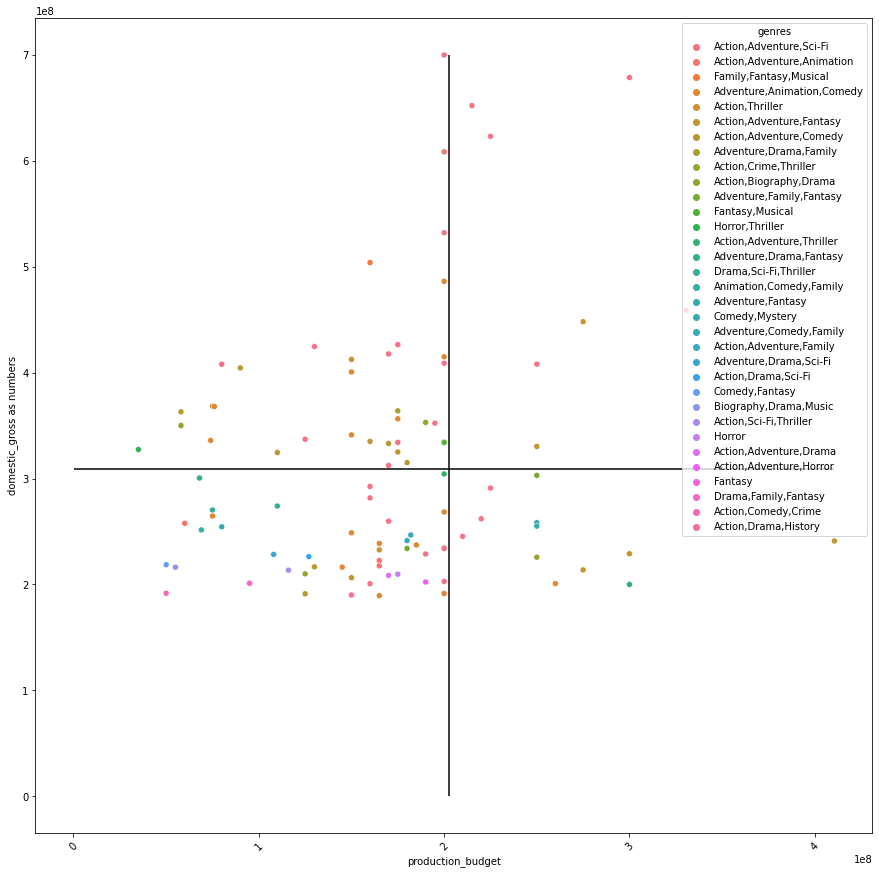

In [72]:
sns.color_palette("colorblind")
fix, ax = plt.subplots(figsize = (15,15))

sns.scatterplot(x = 'production_budget', y = "domestic_gross as numbers", hue = 'genres', data = plot_test_outer_join.sort_values("domestic_gross as numbers", ascending = False).head(100))
ax.vlines(plot_test_outer_join["production_budget"].sort_values(ascending = False).head(100).mean(),ymin = plot_test_outer_join["domestic_gross as numbers"].min(),
          ymax =plot_test_outer_join["domestic_gross as numbers"].max(),
          color =  'black', label ="Average Production")
ax.hlines(plot_test_outer_join["domestic_gross as numbers"].sort_values(ascending = False).head(100).mean(),xmin = plot_test_outer_join["production_budget"].min(),
          xmax =plot_test_outer_join["production_budget"].max(),
          color =  'black', label ="Average Domestic Gross")
plt.xticks(rotation = 45)

In [73]:
df_IMDB_Clean['name_year']

0                                           Sunghursh 2013
1                     One Day Before the Rainy Season 2019
2                          The Other Side of the Wind 2018
3                                     Sabse Bada Sukh 2018
4                            The Wandering Soap Opera 2017
                                ...                       
146139                            Kuambil Lagi Hatiku 2019
146140    Rodolpho Teóphilo - O Legado de um Pioneiro 2015
146141                                Dankyavar Danka 2013
146142                                         6 Gunn 2017
146143                 Chico Albuquerque - Revelações 2013
Name: name_year, Length: 146123, dtype: object

In [74]:
import difflib

In [75]:
difflib.SequenceMatcher(None,"Hi I'm Andy", "hi Im andY").ratio()>.6

True

In [76]:
df_Numbers_2010_on2 = df_Numbers_2010_on.copy()

In [77]:
df_Numbers_2010_on2['name_year'] = df_Numbers_2010_on2['name_year'].apply(lambda x : difflib.get_close_matches(x,df_IMDB_Clean['name_year'],1,.7))

In [176]:
df_Numbers_2010_copy = df_Numbers_2010_on2.copy()

In [180]:
df_Numbers_2010_copy["name_year"] = df_Numbers_2010_copy['name_year'].str[0]

In [181]:
df_Numbers_2010_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",241063875,2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",42762350,2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",459005868,2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",620181382,2017,Star Wars: The Last Jedi 2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",936662225,2015,Star Wars: Episode VII - The Force Awakens 2015
...,...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,0,2014,Stories of Our Lives 2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,0,2015,Family Matters 2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",4584,2012,Newlyweds 2011
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,0,2018,Red 11 2019


In [169]:
df_Numbers_2010_on2.loc[df_Numbers_2010_on2["id"] == 44]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
43,44,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744,2018,[Incredibles 2 2018]
143,44,"Jul 14, 2010",The Sorcerer's Apprentice,"$160,000,000","$63,150,991","$217,986,320",63150991,2010,[The Sorcerer's Apprentice 2010]
243,44,"Mar 27, 2015",Home,"$130,000,000","$177,397,510","$385,997,896",177397510,2015,[Home 2015]
443,44,"Dec 14, 2018",Spider-Man: Into The Spider-Verse 3D,"$90,000,000","$190,173,195","$375,381,768",190173195,2018,[Spider-Man: Into the Spider-Verse 2018]
843,44,"Feb 7, 2014",The Lego Movie,"$60,000,000","$257,784,718","$457,729,388",257784718,2014,[The Lego Movie 2014]
1343,44,"Mar 16, 2012",21 Jump Street,"$42,000,000","$138,447,667","$202,812,429",138447667,2012,[21 Jump Street 2012]
1543,44,"Dec 31, 2019",Down Under Cover,"$40,000,000",$0,$0,0,2019,[Down Under 2016]
1743,44,"Jan 28, 2011",Biutiful,"$35,000,000","$5,101,237","$24,687,524",5101237,2011,[Biutiful 2010]
2043,44,"Oct 10, 2014","Alexander and the Terrible, Horrible, No Good,...","$28,000,000","$66,954,149","$101,379,287",66954149,2014,"[Alexander and the Terrible, Horrible, No Good..."
2243,44,"Apr 23, 2010",The Losers,"$25,000,000","$23,591,432","$29,863,840",23591432,2010,[The Losers 2010]


In [171]:
df_Numbers_2010_copy["name_year"] = df_Numbers_2010_copy["name_year"].astype(str)

In [172]:
df_Numbers_2010_copy.loc[df_Numbers_2010_copy["id"] == 44]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
43,44,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",608581744,2018,['Incredibles 2 2018']
143,44,"Jul 14, 2010",The Sorcerer's Apprentice,"$160,000,000","$63,150,991","$217,986,320",63150991,2010,"[""The Sorcerer's Apprentice 2010""]"
243,44,"Mar 27, 2015",Home,"$130,000,000","$177,397,510","$385,997,896",177397510,2015,['Home 2015']
443,44,"Dec 14, 2018",Spider-Man: Into The Spider-Verse 3D,"$90,000,000","$190,173,195","$375,381,768",190173195,2018,['Spider-Man: Into the Spider-Verse 2018']
843,44,"Feb 7, 2014",The Lego Movie,"$60,000,000","$257,784,718","$457,729,388",257784718,2014,['The Lego Movie 2014']
1343,44,"Mar 16, 2012",21 Jump Street,"$42,000,000","$138,447,667","$202,812,429",138447667,2012,['21 Jump Street 2012']
1543,44,"Dec 31, 2019",Down Under Cover,"$40,000,000",$0,$0,0,2019,['Down Under 2016']
1743,44,"Jan 28, 2011",Biutiful,"$35,000,000","$5,101,237","$24,687,524",5101237,2011,['Biutiful 2010']
2043,44,"Oct 10, 2014","Alexander and the Terrible, Horrible, No Good,...","$28,000,000","$66,954,149","$101,379,287",66954149,2014,"['Alexander and the Terrible, Horrible, No Goo..."
2243,44,"Apr 23, 2010",The Losers,"$25,000,000","$23,591,432","$29,863,840",23591432,2010,['The Losers 2010']


In [123]:
import re

In [130]:
df_Numbers_2010_copy['name_year'] = df_Numbers_2010_copy['name_year'].str.split("['|']").str[1]

In [165]:
df_Numbers_2010_copy_test2 = df_Numbers_2010_copy.loc[df_Numbers_2010_copy['name_year'].notna()]

In [168]:
df_Numbers_2010_copy_test2.loc[df_Numbers_2010_copy_test2["name_year"].str.contains("]")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
143,44,"Jul 14, 2010",The Sorcerer's Apprentice,"$160,000,000","$63,150,991","$217,986,320",63150991,2010,"s Apprentice 2010""]"
196,97,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,"$145,000,000","$216,391,482","$746,921,271",216391482,2012,"s Most Wanted 2012""]"
279,80,"Dec 21, 2016",Assassinâs Creed,"$125,000,000","$54,647,948","$240,759,682",54647948,2016,"s Creed 2016""]"
309,10,"Apr 22, 2016",The Huntsman: Winterâs War,"$115,000,000","$48,003,015","$165,149,302",48003015,2016,"s War 2016""]"
312,13,"Dec 25, 2010",Gulliver's Travels,"$112,000,000","$42,779,261","$232,017,848",42779261,2010,"s Travels 2010""]"
...,...,...,...,...,...,...,...,...,...
5486,87,"Aug 11, 2015",Alleluia! The Devil's Carnival,"$500,000",$0,$0,0,2015,"s Carnival 2016""]"
5564,65,"Dec 31, 2010",Anderson's Cross,"$300,000",$0,$0,0,2010,"s Cross 2010""]"
5565,66,"Dec 8, 2015",Amidst the Devil's Wings,"$300,000",$0,$0,0,2015,"s Wings 2014""]"
5672,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",1597486,2012,"s Sister 2011""]"


In [78]:
df_Numbers_2010_on3 = df_Numbers_2010_on2.copy()

In [79]:
df_Numbers_2010_on3["name_year"] = df_Numbers_2010_on3["name_year"].astype(str)

In [80]:
df_Numbers_2010_on3["name_year"] = df_Numbers_2010_on3['name_year'].str.split('[').str[1]

In [81]:
df_Numbers_2010_on3["name_year"] = df_Numbers_2010_on3["name_year"].str.split("]").str[0]

In [82]:
df_Numbers_2010_on3["name_year"] = df_Numbers_2010_on3["name_year"].str.split("'").str[1]

In [158]:
df_Numbers_2010_on3["name_year"].tail(100)

5566             Death Calls 2010
5567              Compliance 2012
5571                 Sleight 2016
5573              Like Crazy 2011
5583             The Canyons 2013
                  ...            
5761    Stories of Our Lives 2014
5771          Family Matters 2015
5772               Newlyweds 2011
5777                  Red 11 2019
5780    A Plague So Pleasant 2013
Name: name_year, Length: 100, dtype: object

In [84]:
df_IMDB_Clean.loc[df_IMDB_Clean['name_year'].str.contains("Star Wars")]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year
2370,tt10239898,Star Wars: Battle for the Holocrons,Star Wars: Battle for the Holocrons,2020,NaN,"Action,Adventure,Fantasy",Star Wars: Battle for the Holocrons 2020
2947,tt10300394,Untitled Star Wars Film,Untitled Star Wars Film,2022,NaN,None,Untitled Star Wars Film 2022
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,None,Untitled Star Wars Film 2024
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy,Untitled Star Wars Film 2026
3219,tt10321138,RiffTrax: Star Wars: The Force Awakens,RiffTrax: Star Wars: The Force Awakens,2016,NaN,Comedy,RiffTrax: Star Wars: The Force Awakens 2016
34425,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi",Star Wars: Threads of Destiny 2014
41443,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens 2015
42223,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi 2017
42224,tt2527338,Star Wars: The Rise of Skywalker,Star Wars: The Rise of Skywalker,2019,NaN,"Action,Adventure,Fantasy",Star Wars: The Rise of Skywalker 2019
63494,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi",Plastic Galaxy: The Story of Star Wars Toys 2014


In [85]:
    df_outer_join_test_2010_on2 = pd.merge(df_IMDB_Clean, df_Numbers_2010_on3, how = "outer", on = ["name_year", "name_year"])

In [86]:
df_outer_join_test_2010_on2 = df_outer_join_test_2010_on2.loc[(df_outer_join_test_2010_on2['genres'].notna()) & (df_outer_join_test_2010_on2["domestic_gross as numbers"].notna())].sort_values("domestic_gross as numbers", ascending = False)

In [87]:
df_outer_join_test_2010_on2.duplicated().sum()

0

In [88]:
df_outer_join_test_2010_on2["production_budget"] = (df_outer_join_test_2010_on2["production_budget"].str.split("$").str[1])
df_outer_join_test_2010_on2["production_budget"] = df_outer_join_test_2010_on2["production_budget"].apply(lambda x : x.replace(',',""))
df_outer_join_test_2010_on2["production_budget"] = df_outer_join_test_2010_on2["production_budget"].astype(int)
df_outer_join_test_2010_on2["worldwide_gross"] = (df_outer_join_test_2010_on2["worldwide_gross"].str.split("$").str[1])
df_outer_join_test_2010_on2["worldwide_gross"] = df_outer_join_test_2010_on2["worldwide_gross"].apply(lambda x : x.replace(',',""))
df_outer_join_test_2010_on2["worldwide_gross"] = df_outer_join_test_2010_on2["worldwide_gross"].astype(int)

In [89]:
df_outer_join_test_2010_on2.head()

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
41788,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015.0,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens 2015,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,936662225.0,2015.0
19283,tt1825683,Black Panther,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi",Black Panther 2018,42.0,"Feb 16, 2018",Black Panther,200000000,"$700,059,566",1348258224,700059566.0,2018.0
73297,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War 2018,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,678815482.0,2018.0
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864,652270625.0,2015.0
363,tt0848228,The Avengers,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi",The Avengers 2012,27.0,"May 4, 2012",The Avengers,225000000,"$623,279,547",1517935897,623279547.0,2012.0


In [90]:
df_outer_join_test_2010_on2["total_gross"] = df_outer_join_test_2010_on2["domestic_gross as numbers"] + df_outer_join_test_2010_on2["worldwide_gross"]

In [91]:
df_outer_join_test_2010_on2.sort_values("production_budget", ascending = False).head(50)

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,total_gross
6562,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides 2011,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,241063875.0,2011.0,1.286728e+09
112506,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix 2019,3.0,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,42762350.0,2019.0,1.925247e+08
39359,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron 2015,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,459005868.0,2015.0,1.862020e+09
42568,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017.0,152.0,"Action,Adventure,Fantasy",Star Wars: The Last Jedi 2017,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,620181382.0,2017.0,1.936903e+09
41788,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015.0,136.0,"Action,Adventure,Fantasy",Star Wars: Episode VII - The Force Awakens 2015,6.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220,936662225.0,2015.0,2.989973e+09
38718,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller",Spectre 2015,10.0,"Nov 6, 2015",Spectre,300000000,"$200,074,175",879620923,200074175.0,2015.0,1.079695e+09
524,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy",Justice League 2017,9.0,"Nov 17, 2017",Justice League,300000000,"$229,024,295",655945209,229024295.0,2017.0,8.849695e+08
73297,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War 2018,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200,678815482.0,2018.0,2.726950e+09
7019,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller",The Dark Knight Rises 2012,11.0,"Jul 20, 2012",The Dark Knight Rises,275000000,"$448,139,099",1084439099,448139099.0,2012.0,1.532578e+09
5996,tt1210819,The Lone Ranger,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western",The Lone Ranger 2013,13.0,"Jul 2, 2013",The Lone Ranger,275000000,"$89,302,115",260002115,89302115.0,2013.0,3.493042e+08


(array([-1.e+08,  0.e+00,  1.e+08,  2.e+08,  3.e+08,  4.e+08,  5.e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

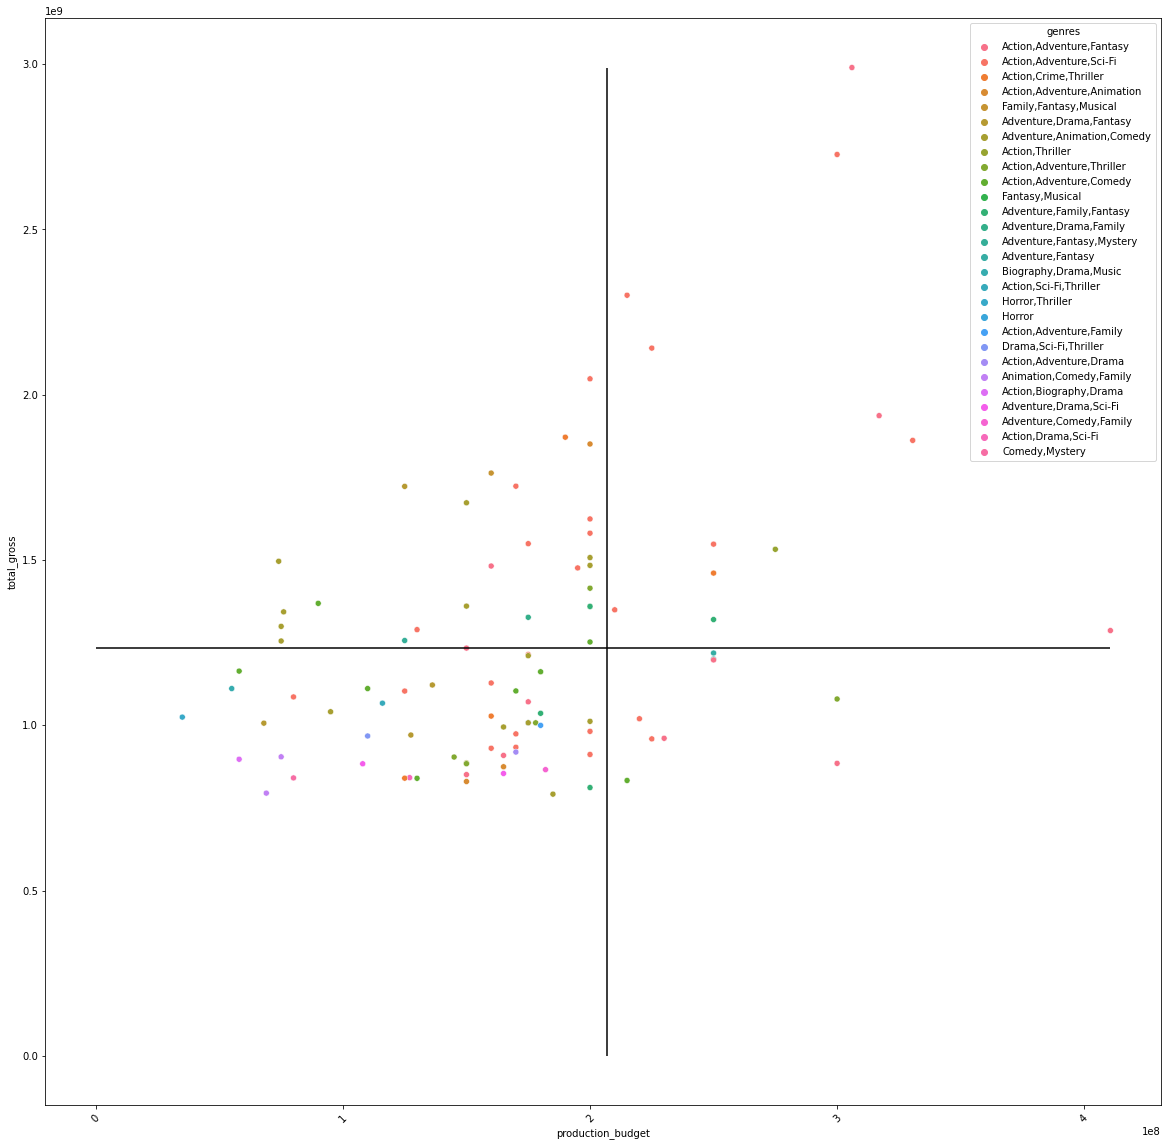

In [92]:
sns.color_palette("colorblind")
fix, ax = plt.subplots(figsize = (20,20))

sns.scatterplot(x = 'production_budget', y = "total_gross", hue = 'genres', data = df_outer_join_test_2010_on2.sort_values("total_gross", ascending = False).head(100))
ax.vlines(df_outer_join_test_2010_on2["production_budget"].sort_values(ascending = False).head(100).mean(),ymin = df_outer_join_test_2010_on2["total_gross"].min(),
          ymax =df_outer_join_test_2010_on2["total_gross"].max(),
          color =  'black', label ="Average Production")
ax.hlines(df_outer_join_test_2010_on2["total_gross"].sort_values(ascending = False).head(100).mean(),xmin = df_outer_join_test_2010_on2["production_budget"].min(),
          xmax =df_outer_join_test_2010_on2["production_budget"].max(),
          color =  'black', label ="Average Domestic Gross")
plt.xticks(rotation = 45)

In [93]:
df_outer_join_test_2010_on2["total_gross"].sum()

338043296019.0

In [94]:
df_outer_join_test_2010_on2[["total_gross"]].value_counts()

total_gross
0.0            257
417106391.0      6
563395406.0      4
18775705.0       4
13630159.0       4
              ... 
138345528.0      1
138575051.0      1
139988799.0      1
140349398.0      1
67825631.0       1
Length: 1782, dtype: int64

In [95]:
df_genre_average = df_outer_join_test_2010_on2.groupby(['genres'])["production_budget", "total_gross"].mean()

<ipython-input-95-545d2b569c39>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genre_average = df_outer_join_test_2010_on2.groupby(['genres'])["production_budget", "total_gross"].mean()


In [96]:
df_genre_average

,production_budget,total_gross
genres,,
Action,18650000.0,1.523146e+07
"Action,Adventure",9250000.0,5.688889e+06
"Action,Adventure,Animation",103675000.0,5.394841e+08
"Action,Adventure,Biography",83750000.0,2.963529e+08
"Action,Adventure,Comedy",90718750.0,4.565959e+08
...,...,...
"Romance,Thriller",1400000.0,5.634899e+06
Sci-Fi,785000.0,4.277500e+03
"Sci-Fi,Thriller",12510000.0,7.475808e+06


<AxesSubplot:xlabel='production_budget', ylabel='total_gross'>

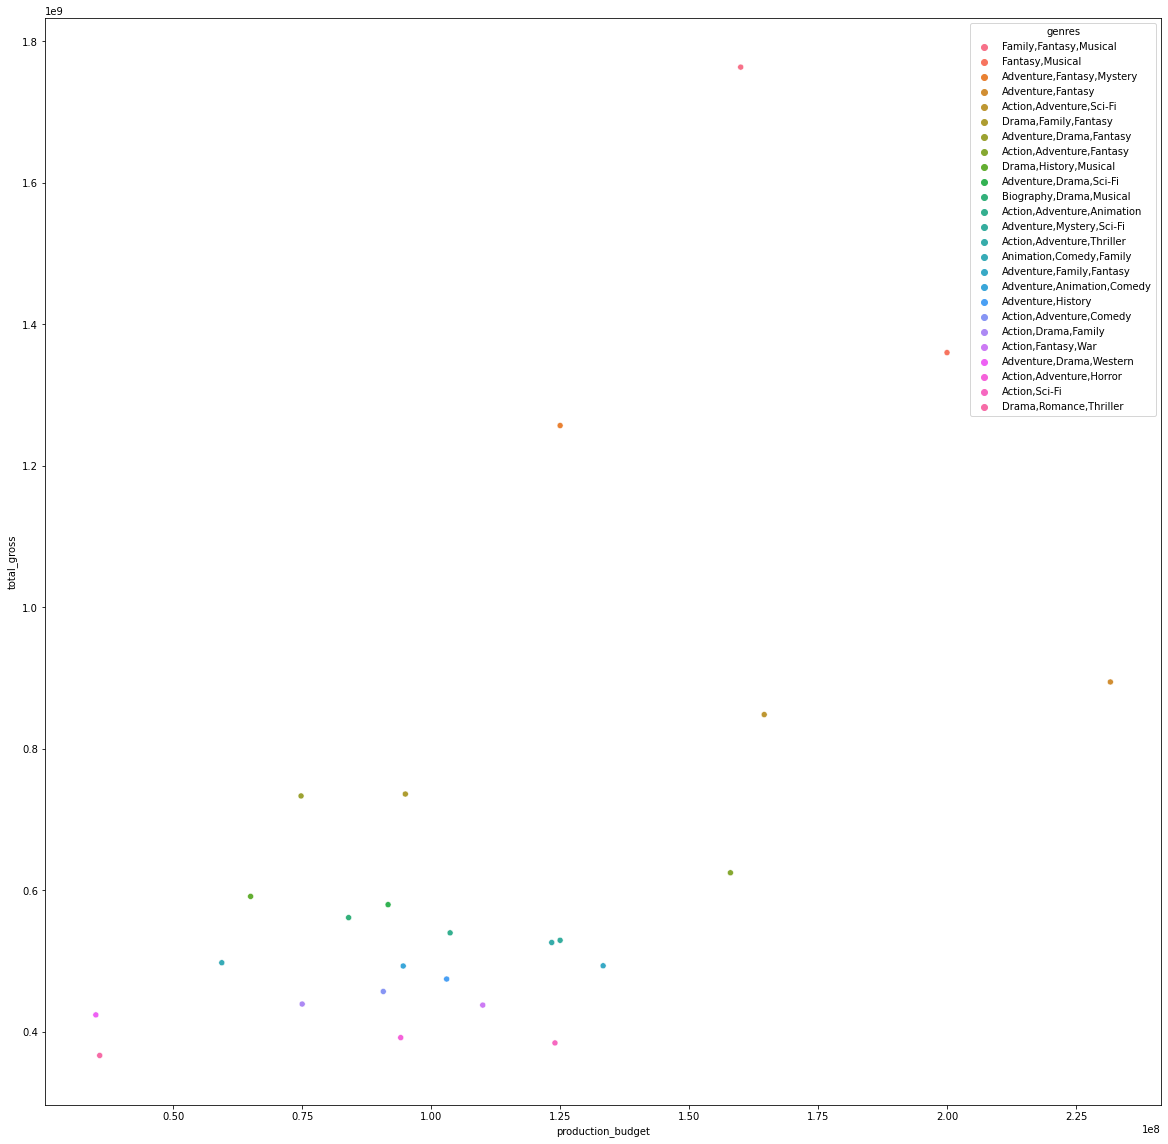

In [175]:
fix, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(x = 'production_budget', y = 'total_gross',hue = 'genres', data = df_genre_average.sort_values('total_gross',ascending = False).head(25))

In [100]:
df_outer_join_test_2010_on2.loc[df_outer_join_test_2010_on2["genres"] == "Family,Fantasy,Musical"]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,total_gross
46955,tt2771200,Beauty and the Beast,Beauty and the Beast,2017.0,129.0,"Family,Fantasy,Musical",Beauty and the Beast 2017,35.0,"Mar 17, 2017",Beauty and the Beast,160000000,"$504,014,165",1259199706,504014165.0,2017.0,1.763214e+09


In [98]:
df_genre_average.sort_values('total_gross', ascending = False).head(25)

,production_budget,total_gross
genres,,
"Family,Fantasy,Musical",1.600000e+08,1.763214e+09
"Fantasy,Musical",2.000000e+08,1.359682e+09
"Adventure,Fantasy,Mystery",1.250000e+08,1.256563e+09
"Adventure,Fantasy",2.316667e+08,8.941021e+08
"Action,Adventure,Sci-Fi",1.645607e+08,8.480069e+08
"Drama,Family,Fantasy",9.500000e+07,7.357027e+08
"Adventure,Drama,Fantasy",7.478125e+07,7.329860e+08
"Action,Adventure,Fantasy",1.580167e+08,6.243982e+08
"Drama,History,Musical",6.500000e+07,5.909788e+08


### This code below to save in csv because it takes to long to do partial string match in Jupyter Notebook

In [217]:
  df_merge_IMDB_Numbers_save = pd.merge(df_IMDB_Clean, df_Numbers_2010_copy, how = "outer", on = ["name_year", "name_year"])

In [177]:
pd.merge(df_IMDB_Clean, df_Numbers_2010_copy, how = "outer", on =["name_year", "name_year".str[0]])

AttributeError: 'str' object has no attribute 'str'

In [184]:
df_merge_IMDB_Numbers_save.to_csv(r'zippedData/merged_IMDB_Numbers.csv', index = False)

In [185]:
!ls zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
merged_IMDB_Numbers.csv
merged_IMDB_Numbers2.csv
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [186]:
df_test = pd.read_csv("zippedData/merged_IMDB_Numbers.csv")

In [152]:
df_Numbers_2010_copy_test = df_Numbers_2010_copy.loc[df_Numbers_2010_copy['name_year'].notna()]

In [157]:
df_Numbers_2010_copy_test.loc[df_Numbers_2010_copy_test['name_year'].str.contains("]")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year,name_year
143,44,"Jul 14, 2010",The Sorcerer's Apprentice,"$160,000,000","$63,150,991","$217,986,320",63150991,2010,"s Apprentice 2010""]"
196,97,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,"$145,000,000","$216,391,482","$746,921,271",216391482,2012,"s Most Wanted 2012""]"
279,80,"Dec 21, 2016",Assassinâs Creed,"$125,000,000","$54,647,948","$240,759,682",54647948,2016,"s Creed 2016""]"
309,10,"Apr 22, 2016",The Huntsman: Winterâs War,"$115,000,000","$48,003,015","$165,149,302",48003015,2016,"s War 2016""]"
312,13,"Dec 25, 2010",Gulliver's Travels,"$112,000,000","$42,779,261","$232,017,848",42779261,2010,"s Travels 2010""]"
...,...,...,...,...,...,...,...,...,...
5486,87,"Aug 11, 2015",Alleluia! The Devil's Carnival,"$500,000",$0,$0,0,2015,"s Carnival 2016""]"
5564,65,"Dec 31, 2010",Anderson's Cross,"$300,000",$0,$0,0,2010,"s Cross 2010""]"
5565,66,"Dec 8, 2015",Amidst the Devil's Wings,"$300,000",$0,$0,0,2015,"s Wings 2014""]"
5672,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",1597486,2012,"s Sister 2011""]"


In [190]:
df_test = df_test.loc[df_test['name_year'].notna()]

In [191]:
df_test.loc[df_test['name_year'].str.contains("]")]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
2334,tt10230002,[S.O.S] Sói Trang,[S.O.S] Sói Trang,2017.0,104.0,Drama,[S.O.S] Sói Trang 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6927,tt1337525,Limen [Omission],Limen [Omission],2012.0,94.0,"Crime,Drama,Mystery",Limen [Omission] 2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11424,tt1623783,ODC [Ordinary Decent Criminal],ODC [Ordinary Decent Criminal],2010.0,110.0,Crime,ODC [Ordinary Decent Criminal] 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11658,tt1631824,Te[rekam],Te[rekam],2010.0,75.0,Horror,Te[rekam] 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12247,tt1649443,[REC] 4: Apocalypse,[REC] 4: Apocalipsis,2014.0,95.0,"Horror,Thriller",[REC] 4: Apocalypse 2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,tt1649444,[REC] 3: Genesis,[Rec]³: Génesis,2012.0,80.0,"Horror,Thriller",[REC] 3: Genesis 2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22864,tt1928217,Madrigal [Olympia],Madrigal [Olympia],2010.0,90.0,Drama,Madrigal [Olympia] 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23249,tt1941429,*MEI [MEIG] Voci migranti,*MEI [MEIG] Voci migranti,2010.0,50.0,Documentary,*MEI [MEIG] Voci migranti 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23658,tt1954320,Carl[a],Carla,2011.0,100.0,Drama,Carl[a] 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27898,tt2082518,[S]comparse,[S]comparse,2011.0,62.0,"Documentary,Drama",[S]comparse 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_test = df_test.loc[(df_test["genres"].notna()) & (df_test["domestic_gross as numbers"].notna())]

In [199]:
df_BOM["name_year"] = df_BOM['title'] + " " + df_BOM['year'].astype(str)

In [203]:
df_BOM = df_BOM.loc[df_BOM["year"] >= 2010]

In [ ]:
df_Numbers_2010_on2['name_year'] = df_Numbers_2010_on2['name_year'].apply(lambda x : difflib.get_close_matches(x,df_IMDB_Clean['name_year'],1,.7))

In [236]:
df_BOM_copy = df_BOM.copy()

In [237]:
df_BOM_copy['name_year'] = df_BOM_copy['name_year'].apply(lambda x : difflib.get_close_matches(x,df_test["name_year"],1,.8))

In [194]:
df_test

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross as numbers,release_date_year
20,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",Foodfight! 2012,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",0.0,2012.0
55,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",58236838.0,2013.0
59,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",26017685.0,2014.0
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0
63,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",13109815.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142760,tt9411866,Molly,Molly,2020.0,NaN,Drama,Molly 2020,95.0,"Dec 31, 2020",Moonfall,"$150,000,000",$0,$0,0.0,2020.0
142982,tt9447948,317,317,2019.0,NaN,Documentary,317 2019,72.0,"Dec 31, 2019",355,"$75,000,000",$0,$0,0.0,2019.0
143849,tt9589006,The Living Thames,The Living Thames,2018.0,60.0,Documentary,The Living Thames 2018,62.0,"May 14, 2010",The Living Wake,"$500,000","$12,232","$12,232",12232.0,2010.0
144494,tt9671038,Heróis,Heróis,2018.0,70.0,Documentary,Heróis 2018,75.0,"Oct 5, 2018",Hevi reissu,"$3,800,000","$10,153","$10,153",10153.0,2018.0


In [238]:
df_BOM_copy["name_year"] = df_BOM_copy["name_year"].str[0]

In [213]:
pd.merge

,title,studio,domestic_gross,foreign_gross,year,name_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Mule 2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,El Chicano 2018
3385,The Swan,Synergetic,2400.0,NaN,2018,The Snowman 2017


In [239]:
df_merge_IMDB_Numbers_BOM_save = pd.merge(df_merge_IMDB_Numbers_save, df_BOM_copy, how = "outer", on = ["name_year", "name_year"])

In [221]:
df_merge_IMDB_Numbers_BOM_save.loc[(df_merge_IMDB_Numbers_BOM_save["genres"].notna()) & (df_merge_IMDB_Numbers_BOM_save["domestic_gross as numbers"].notna()) & (df_merge_IMDB_Numbers_BOM_save["studio"].notna())]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,domestic_gross as numbers,release_date_year,title,studio,domestic_gross_y,foreign_gross,year
55,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",58236838.0,2013.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
59,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",26017685.0,2014.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0,Jurassic Park 3D,Uni.,45400000.0,71100000,2013.0
62,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
64,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",13109815.0,2011.0,The Rum Diary,FD,13100000.0,10800000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138631,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",90380162.0,2010.0,Red,Sum.,90400000.0,108600000,2010.0
138632,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",90380162.0,2010.0,Ready,Eros,955000.0,NaN,2011.0
138633,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",90380162.0,2010.0,Rodin,Cohen,44300.0,NaN,2018.0
138669,tt8852552,Icarus,Icarus,2010.0,78.0,Thriller,Icarus 2010,91.0,"Feb 9, 2010",Icarus,"$6,000,000",$0,$0,0.0,2010.0,Marius,KL,9800.0,2200000,2014.0


In [222]:
df_merge_IMDB_Numbers_BOM_save.to_csv(r'zippedData/merged_IMDB_Numbers_BOM.csv', index = False)

In [223]:
!ls zippedData

bom.movie_gross.csv.gz
im.db
im.db.zip
merged_IMDB_Numbers.csv
merged_IMDB_Numbers2.csv
merged_IMDB_Numbers_BOM.csv
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [241]:
df_merge_IMDB_Numbers_BOM_save = df_merge_IMDB_Numbers_BOM_save.loc[(df_merge_IMDB_Numbers_BOM_save["genres"].notna()) & (df_merge_IMDB_Numbers_BOM_save["domestic_gross as numbers"].notna()) & (df_merge_IMDB_Numbers_BOM_save["studio"].notna())]

In [242]:
df_merge_IMDB_Numbers_BOM_save.loc[df_merge_IMDB_Numbers_BOM_save.duplicated(['name_year', "title"])]

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,domestic_gross as numbers,release_date_year,title,studio,domestic_gross_y,foreign_gross,year
120,tt4453750,Before We Go,Before We Go,2014.0,84.0,"Documentary,Drama,News",Before We Go 2014,52.0,"Sep 4, 2015",Before We Go,"$3,000,000","$37,151","$483,938",37151.0,2015.0,Before We Go,RTWC,37200.0,NaN,2015.0
668,tt4192918,The Promise,The Promise,2017.0,NaN,Comedy,The Promise 2017,78.0,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",8224288.0,2017.0,The Promise (2017),ORF,8199999.0,4200000,2017.0
669,tt4192918,The Promise,The Promise,2017.0,NaN,Comedy,The Promise 2017,78.0,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",8224288.0,2017.0,The Prison,WGUSA,207000.0,NaN,2017.0
670,tt7232438,The Promise,Puen Tee Raluek,2017.0,114.0,"Drama,Horror,Thriller",The Promise 2017,78.0,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",8224288.0,2017.0,The Promise (2017),ORF,8199999.0,4200000,2017.0
671,tt7232438,The Promise,Puen Tee Raluek,2017.0,114.0,"Drama,Horror,Thriller",The Promise 2017,78.0,"Apr 21, 2017",The Promise,"$90,000,000","$8,224,288","$10,551,417",8224288.0,2017.0,The Prison,WGUSA,207000.0,NaN,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74593,tt7578246,The Wall,The Wall,2017.0,NaN,Documentary,The Wall 2017,29.0,"May 12, 2017",The Wall,"$3,000,000","$1,803,064","$4,495,262",1803064.0,2017.0,The Wall,RAtt.,1800000.0,2700000,2017.0
81424,tt5897002,Denial,Denial,2016.0,93.0,Documentary,Denial 2016,66.0,"Sep 30, 2016",Denial,"$10,000,000","$4,073,448","$9,263,940",4073448.0,2016.0,Denial,BST,4099999.0,NaN,2016.0
83559,tt5328340,Lights Out,Lights Out,2016.0,90.0,Documentary,Lights Out 2016,55.0,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",67268835.0,2016.0,Lights Out,WB (NL),67300000.0,81600000,2016.0
85490,tt4974794,The Priest,The Priest,2015.0,48.0,Drama,The Priest 2015,20.0,"Mar 10, 2015",The Pet,"$1,000,000",$0,$0,0.0,2015.0,The Priests,CJ,185000.0,NaN,2015.0


In [243]:
df_merge_IMDB_Numbers_BOM_save

,movie_id,primary_title,original_title,start_year,runtime_mintues,genres,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,domestic_gross as numbers,release_date_year,title,studio,domestic_gross_y,foreign_gross,year
55,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty 2013,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",58236838.0,2013.0,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013.0
59,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",A Walk Among the Tombstones 2014,67.0,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",26017685.0,2014.0,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014.0
61,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",Jurassic World 2015,34.0,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",652270625.0,2015.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0
63,tt0376136,The Rum Diary,The Rum Diary,2011.0,119.0,"Comedy,Drama",The Rum Diary 2011,16.0,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",13109815.0,2011.0,The Rum Diary,FD,13100000.0,10800000,2011.0
65,tt0377981,Gnomeo & Juliet,Gnomeo & Juliet,2011.0,84.0,"Adventure,Animation,Comedy",Gnomeo & Juliet 2011,6.0,"Feb 11, 2011",Gnomeo and Juliet,"$36,000,000","$99,967,670","$193,737,977",99967670.0,2011.0,Gnomeo and Juliet,BV,100000000.0,94000000,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129497,tt7959026,The Mule,The Mule,2018.0,116.0,"Crime,Drama,Thriller",The Mule 2018,100.0,"Dec 14, 2018",The Mule,"$50,000,000","$103,804,407","$170,857,676",103804407.0,2018.0,The Quake,Magn.,6200.0,NaN,2018.0
130421,tt8043306,Teefa in Trouble,Teefa in Trouble,2018.0,155.0,"Action,Comedy,Crime",Teefa in Trouble 2018,8.0,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",0.0,2018.0,Terkel in Trouble,Indic.,10800.0,NaN,2010.0
130956,tt8097306,Nobody's Fool,Nobody's Fool,2018.0,110.0,"Comedy,Drama,Romance",Nobody's Fool 2018,38.0,"Nov 2, 2018",Nobodyâs Fool,"$19,000,000","$31,713,110","$32,589,493",31713110.0,2018.0,Nobody's Fool,Par.,31700000.0,1800000,2018.0
138094,tt8851190,Red,Red,2018.0,90.0,Drama,Red 2018,63.0,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693",90380162.0,2010.0,Red,Sum.,90400000.0,108600000,2010.0


In [244]:
df_test.duplicated("name_year").sum()

83